# EIS fitting with RC circuit
by konkon
## Import packages 

In [15]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

## Difine function for fitting
In this case, we assume simple RC circuit below. Capacitor was replaced by CPE(Constant phase element). This circuit has 4 fitting parameters, solution resistance Rs, charge transfer resistance Rc1, and Q1, n1 as CPE constants. 
<img src="circuit.png">

In [16]:
#Function for fitting by scypy.optimize.curve_fit
def RCcircuit(f, *params):    
    Rs = params[0]
    Rc1 = params[1]
    Q1 = params[2]
    n1 = params[3]
    
    omega = 2 * np.pi * f
    Zc1 = 1 + (np.power((1j*omega), n1)*Rc1*Q1)
    Z = Rs + (Rc1/Zc1)
    Z_abs = np.sqrt(Z.real*Z.real + Z.imag*Z.imag)
    return Z_abs

#Function for draw Bode and Nyquist plot
def plot(f, *params):    
    Rs = params[0]
    Rc1 = params[1]
    Q1 = params[2]
    n1 = params[3]
    
    omega = 2 * np.pi * f
    Zc1 = 1 + (np.power((1j*omega), n1)*Rc1*Q1)
    Z = Rs + (Rc1/Zc1)
    return Z.real, Z.imag

## Load sample data
Sample EIS data is "RC_sample.csv" at the same directory.
Please load it as a pandas dataframe.

In [17]:
dataset = pd.read_csv('RC_sample.csv')
f_x = dataset['freq. /Hz']
Z = dataset['Z1 /ohm'] + dataset['Z2 /ohm']*1j
Z_abs = np.sqrt(dataset['Z1 /ohm']*dataset['Z1 /ohm']+
                dataset['Z2 /ohm']*dataset['Z2 /ohm'])

## Set initial parameters and bounds
Choice of appropriate initial values is very important. If neccesary, you can set bounds for fitting. CPE constant "n" usually takes 0~1.

In [22]:
#initial parameters(['Rs', 'Rc1', 'Q1', 'n1'])
init = [10, 1000, 1.0E-11, 0.9]

#bounds for each parameters
low = [0, 0, 0, 0]
high = [1.0E+11, 1.0E+11, 1.0E+11, 1]

## Fit the plots with scipy.optimize.curve_fit
Optimized parameters and estimated covariance are stored in "popt" and "pcov", respectively.

In [26]:
popt, pcov = curve_fit(RCcircuit, f_x, Z_abs, p0=init, bounds=(low,high))
print(popt)

[5.67230594e+02 8.16267389e+03 4.98261181e-07 9.91433470e-01]


In [24]:
#Print each optimized parameters
param_name = ['Rs', 'Rc1', 'Q1', 'n1']
for i, j in zip(param_name, popt.astype(np.float32)):
    print(i+' = {:E}'.format(j))

Rs = 5.672306E+02
Rc1 = 8.162674E+03
Q1 = 4.982612E-07
n1 = 9.914334E-01


## Nyquist plot of sample and fitted curve

Text(0,0.5,'-Z2 /ohm')

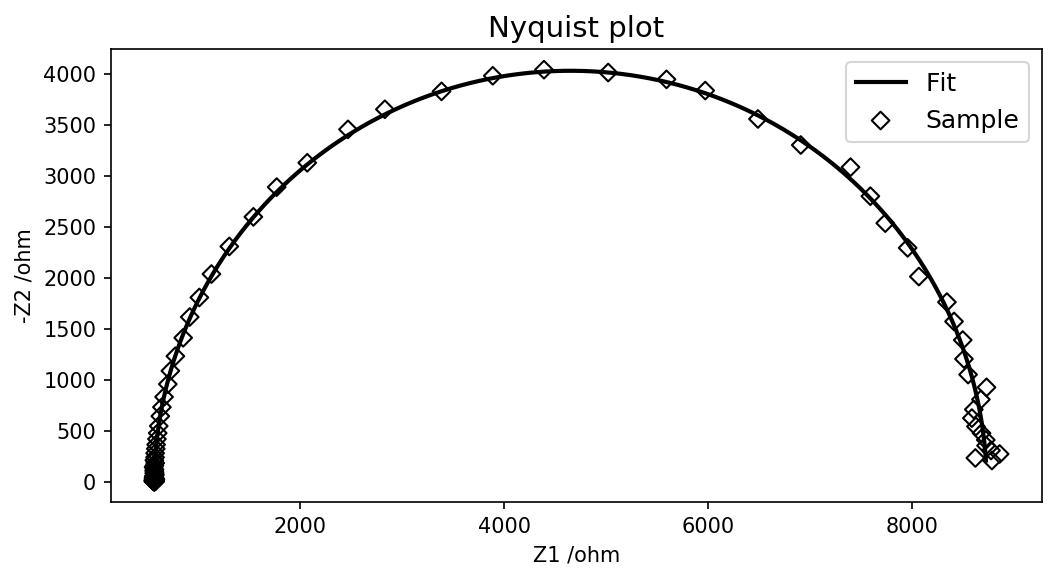

In [27]:
logx = np.logspace(0, 6, 10001)
fit = plot(logx, *popt)

fig = plt.figure(figsize=(10,4), dpi=150)
plt.scatter(Z.real, -Z.imag, edgecolor='black', facecolor='None', marker='D', label='Sample')
plt.plot(fit[0], -fit[1], lw=2, c='black', label='Fit')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize=12)
plt.title("Nyquist plot", fontsize=14)
plt.xlabel('Z1 /ohm')
plt.ylabel('-Z2 /ohm')

##  plot of sample and fitted curve

Text(0.5,0,'frequency (Hz)')

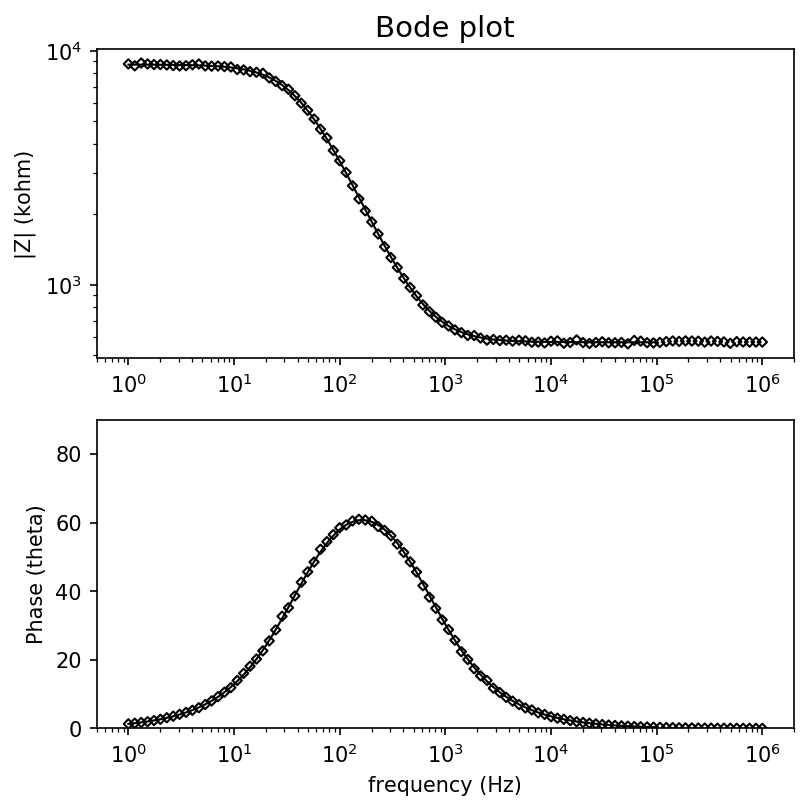

In [28]:
logx = np.logspace(0, 5, 1001)

phase = np.arctan(-Z.imag/Z.real)
phase = np.rad2deg(phase)

fit = plot(logx, *popt)
fit_abs = RCcircuit(logx, *popt)

fig = plt.figure(figsize=(6,6), dpi=150)
plt.subplot(2,1,1)
plt.scatter(f_x, Z_abs, edgecolor='black', facecolor='None', marker='D', s=10, label='Experimental')
plt.plot(logx, fit_abs, lw=1, c='black')
plt.title("Bode plot", fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('|Z| (kohm)')
plt.subplot(2,1,2)
plt.scatter(f_x, phase, edgecolor='black', facecolor='None', marker='D', s=10, label='Experimental')
plt.plot(logx, np.rad2deg(np.arctan(-fit[1]/fit[0])), lw=1, c='black')
plt.ylim(0,90)
plt.xscale('log')
plt.ylabel('Phase (theta)')
plt.xlabel('frequency (Hz)')